<class 'pandas.core.frame.DataFrame'>
Index: 344914 entries, 0 to 346258
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    344914 non-null  object 
 1   Open    344914 non-null  float64
 2   High    344914 non-null  float64
 3   Low     344914 non-null  float64
 4   Close   344914 non-null  float64
 5   Volume  344914 non-null  int64  
 6   ticker  344914 non-null  object 
 7   name    344914 non-null  object 
 8   target  344914 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 26.3+ MB
None
                        Date      Open      High       Low     Close  \
0  2020-04-10 00:00:00+00:00  0.832005  1.313487  0.694187  0.951054   
1  2020-04-11 00:00:00+00:00  0.951054  1.049073  0.765020  0.776819   
2  2020-04-12 00:00:00+00:00  0.785448  0.956670  0.762426  0.882507   
3  2020-04-13 00:00:00+00:00  0.890760  0.891603  0.773976  0.777832   
4  2020-04-14 00:00:00+00:00  0.777832  0.796472 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


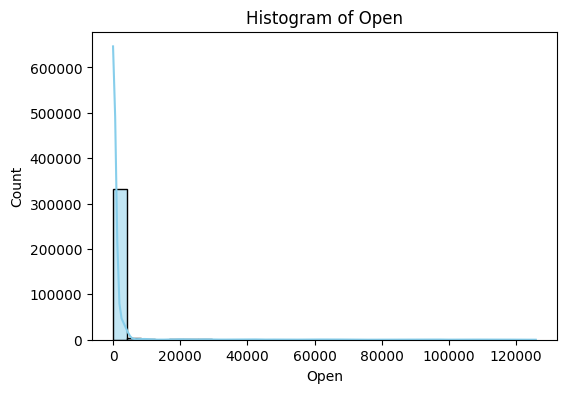

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


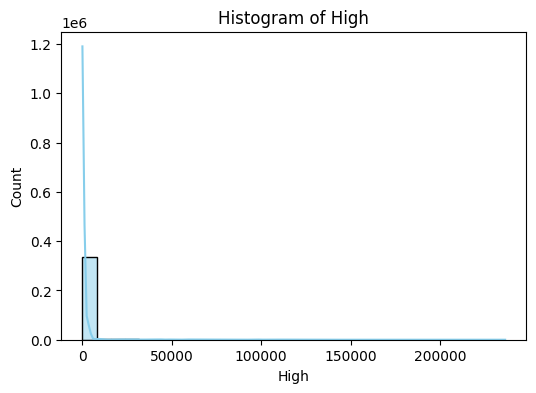

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


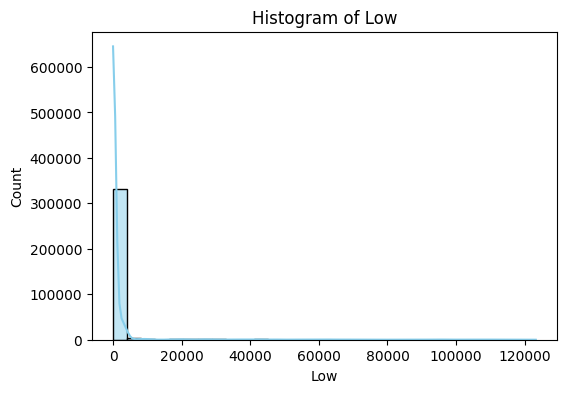

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


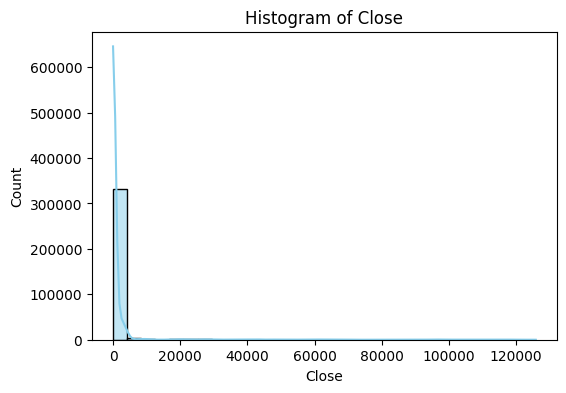

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


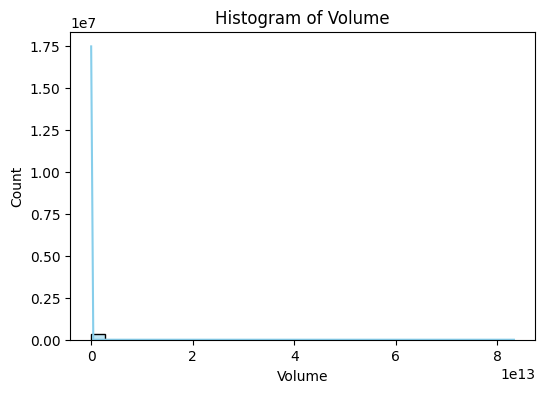

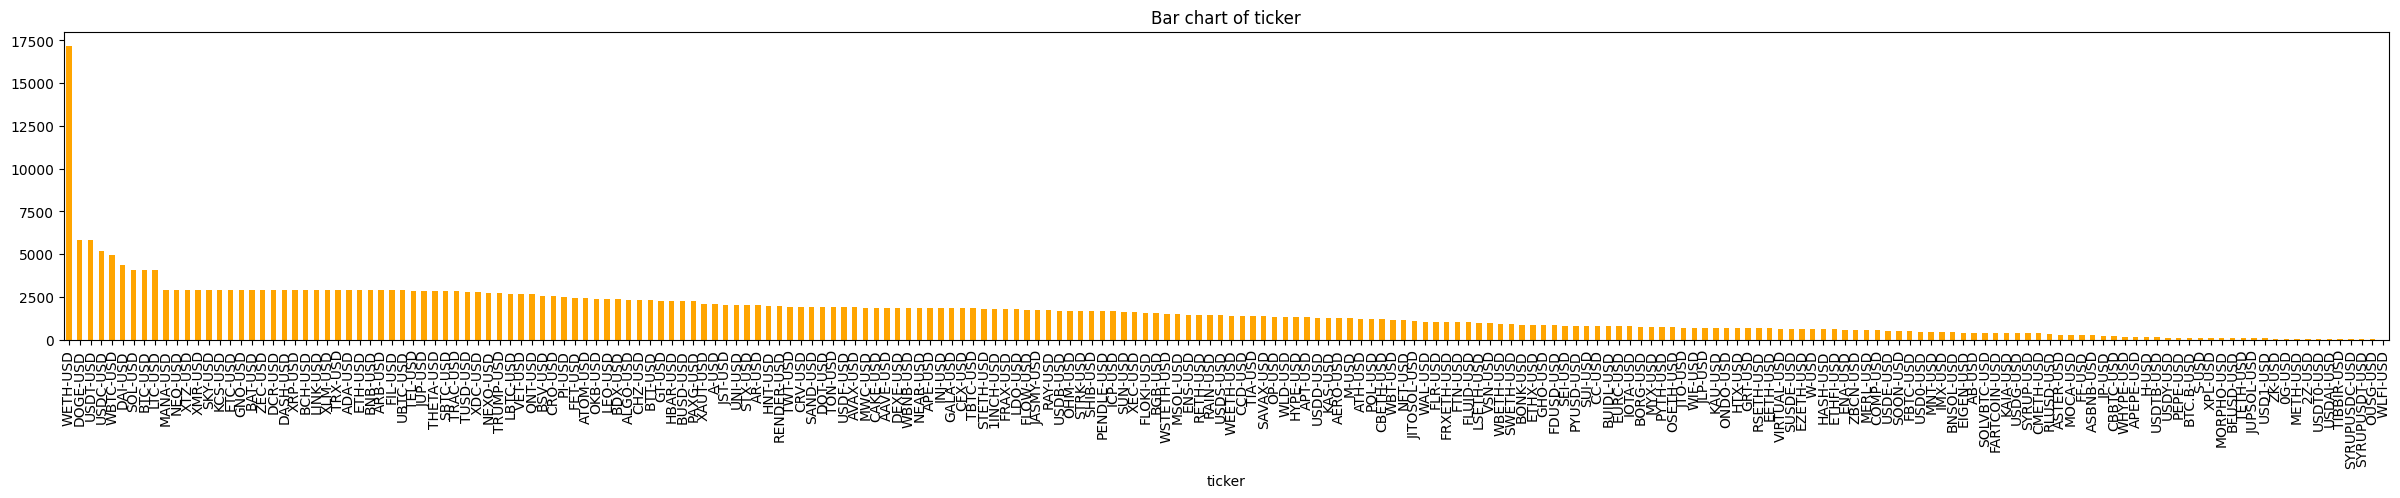

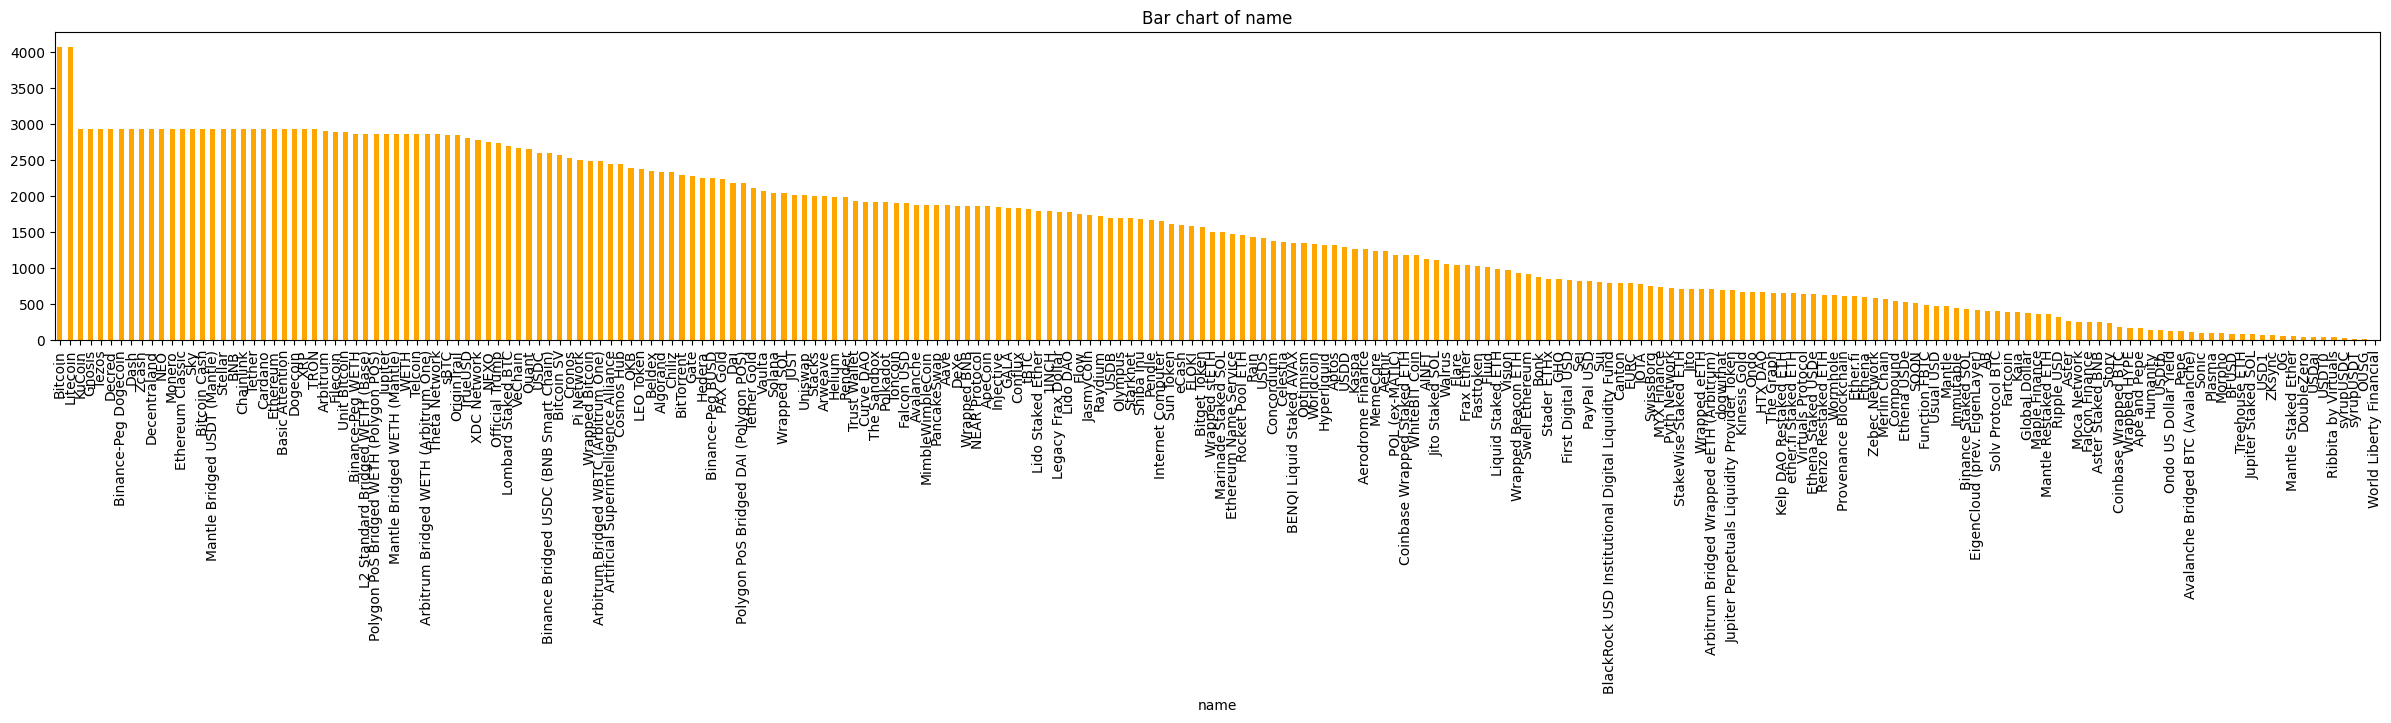

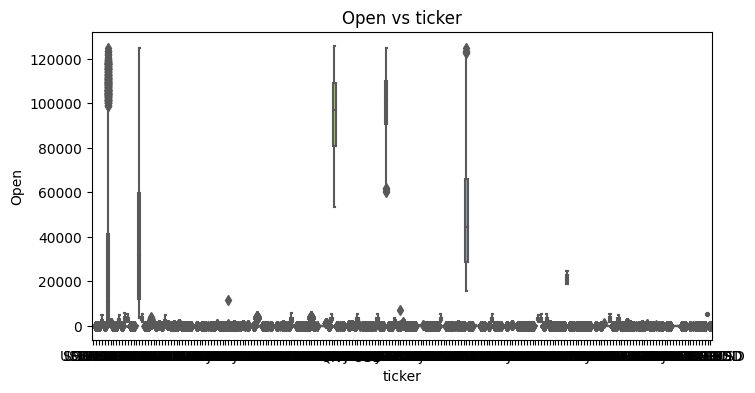

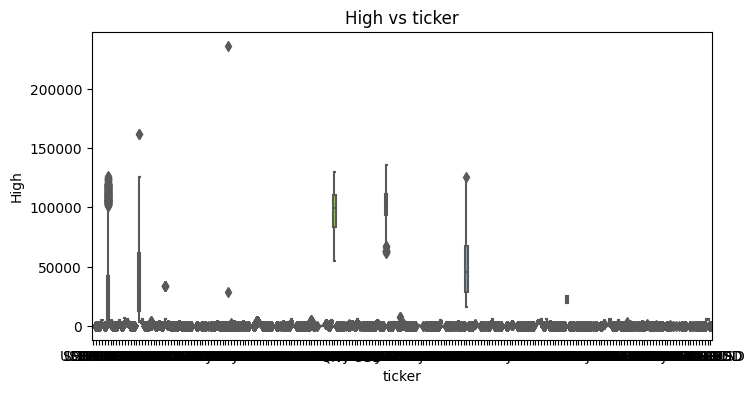

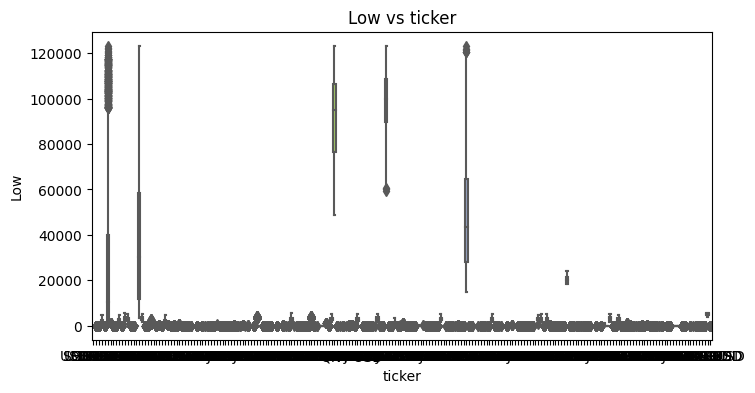

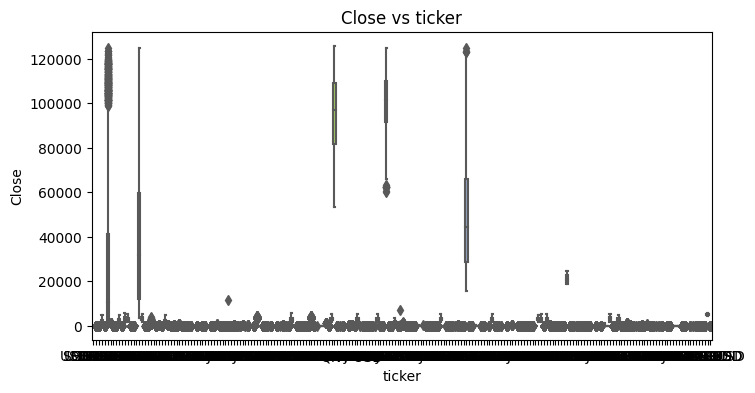

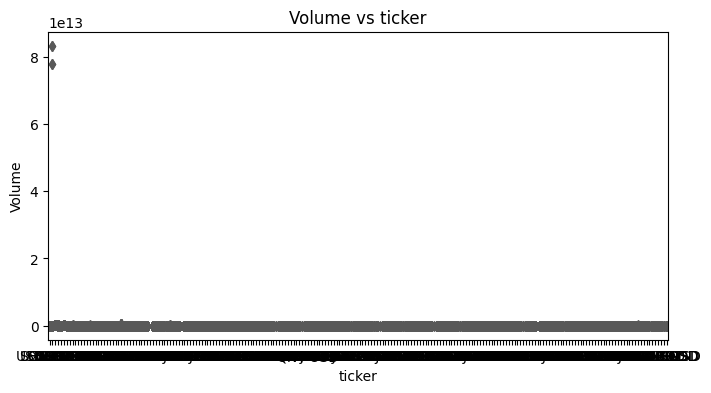

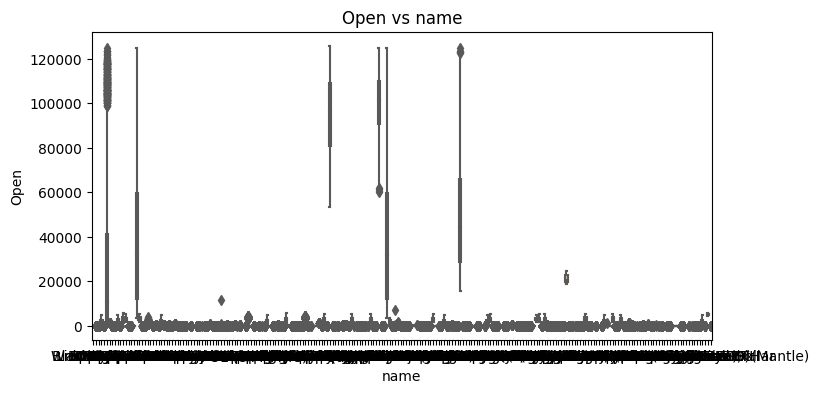

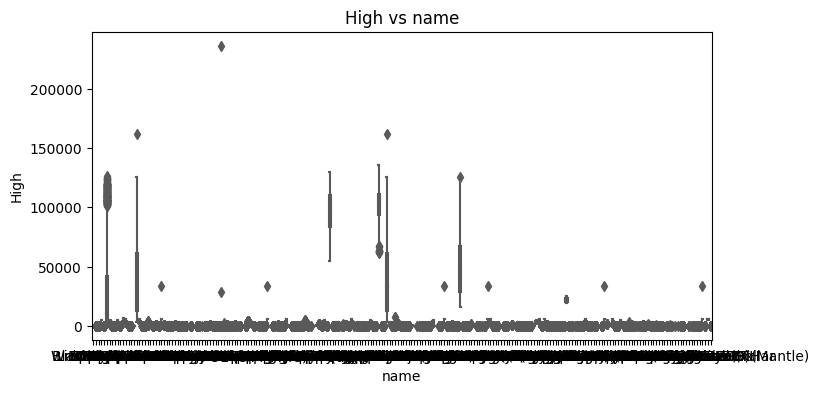

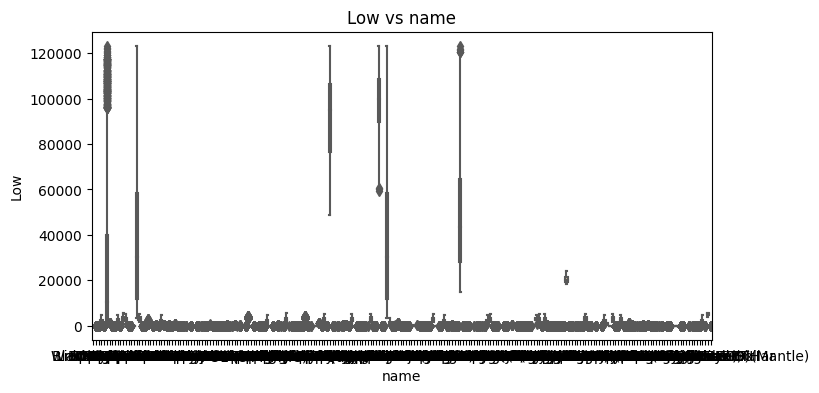

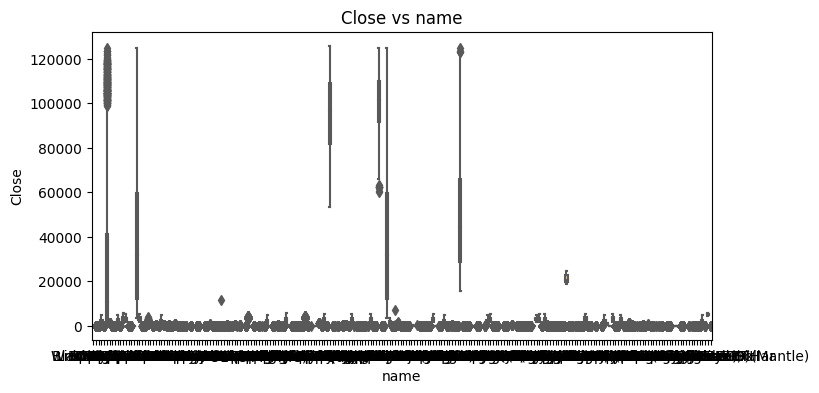

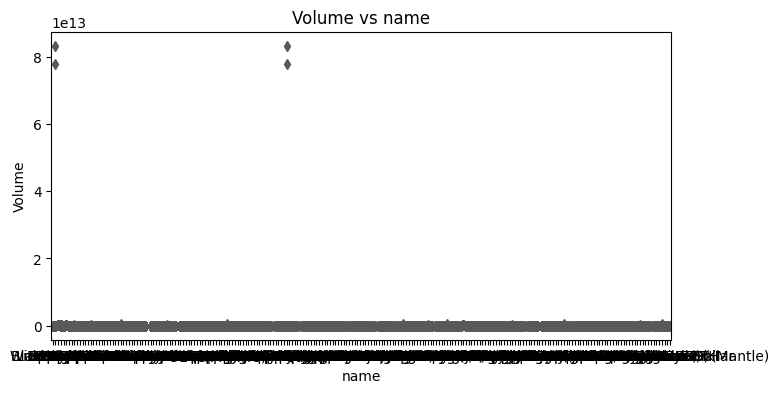

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ff5daaca200> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff5daac98a0> (for post_execute):


KeyboardInterrupt: 

In [13]:
# ===============================
# 1. IMPORT LIBRARIES
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# ===============================
# 2. LOAD DATA
# ===============================
df = pd.read_csv('/kaggle/input/cryptocurrency-historical-prices-top-100-2025/Crypto_historical_data.csv')

# ===============================
# 3. CREATE TARGET = NEXT DAY CLOSE
# ===============================
df['target'] = df['Close'].shift(-1)  # next day close
df.dropna(inplace=True)  # drop last row where target is NaN

# ===============================
# 4. DATA INSIGHT
# ===============================
print(df.info())
print(df.head())
print(df.describe())

# ===============================
# 5. IDENTIFY NUMERICAL AND CATEGORICAL FEATURES
# ===============================
num_features = ['Open', 'High', 'Low', 'Close', 'Volume']
cat_features = ['ticker','name']  # adjust if more categorical features exist

# ===============================
# 6. HISTOGRAMS FOR NUMERICAL FEATURES
# ===============================
for col in num_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.show()

# ===============================
# 7. BAR CHARTS FOR CATEGORICAL FEATURES
# ===============================
for col in cat_features:
    plt.figure(figsize=(30,4))
    df[col].value_counts().plot(kind='bar', color='orange')
    plt.title(f'Bar chart of {col}')
    plt.show()

# ===============================
# 8. CATEGORICAL vs NUMERICAL
# ===============================
for cat in cat_features:
    for num in num_features:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, data=df, palette='Set2')
        plt.title(f'{num} vs {cat}')
        plt.show()

# ===============================
# 9. NUMERICAL vs NUMERICAL PAIR PLOT
# ===============================
sns.pairplot(df[num_features + ['target']])
plt.show()

# ===============================
# 10. MISSING DATA HANDLING
# ===============================
num_imputer = SimpleImputer(strategy='median')
df[num_features] = num_imputer.fit_transform(df[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

print("Missing values after imputation:\n", df.isnull().sum())

# ===============================
# 11. ONE HOT ENCODING FOR CATEGORICAL FEATURES
# ===============================
ohe = OneHotEncoder(sparse=False, drop='first')
cat_encoded = ohe.fit_transform(df[cat_features])
cat_encoded_df = pd.DataFrame(cat_encoded, columns=ohe.get_feature_names_out(cat_features))
df = pd.concat([df.drop(columns=cat_features), cat_encoded_df], axis=1)

# ===============================
# 12. NORMALIZATION / STANDARDIZATION FOR NUMERICAL FEATURES
# ===============================
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# ===============================
# 13. OUTLIER REMOVAL USING Z-SCORE
# ===============================
z_scores = np.abs(zscore(df[num_features + ['target']]))
df = df[(z_scores < 3).all(axis=1)]
print("Shape after outlier removal:", df.shape)

# ===============================
# 14. CORRELATION MATRIX & FEATURE DROP
# ===============================
corr_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Drop highly correlated features (threshold >0.95)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.95)]
df.drop(columns=to_drop, inplace=True)
print("Dropped highly correlated features:", to_drop)

# ===============================
# 15. FINAL FEATURES AND TARGET
# ===============================
X = df.drop(columns=['target'])
y = df['target']

# ===============================
# 16. OPTIONAL: TRAIN-TEST SPLIT
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)  # shuffle=False to respect time series order

print("Prepared dataset for ML:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)